### Data Preparation

In [2]:
#!pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [4]:
pd.read_csv('pristine_data.csv')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,E',Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,f,T,E',E'',tan del,NaN,T(°C),25.0,35.0,...,56.0,66.0,77.000,87.000,97.000,108.000,118.0000,129.0000,139.0000,150.0000
1,NaN,Hz,°C,MPa,MPa,NaN,NaN,0.1,722.0,727.0,...,660.0,580.0,465.901,293.799,183.506,114.649,59.0295,29.2329,15.6982,12.1864
2,NaN,0.1,26.7,7.22E+02,33.92465,0.04698,NaN,0.17,726.0,708.0,...,646.0,579.0,481.482,335.186,235.412,148.878,76.2148,36.3562,17.6256,12.3904
3,NaN,0.17609,25.8,7.26E+02,28.88208,0.0398,NaN,0.31,729.0,711.0,...,646.0,586.0,497.374,374.861,276.511,180.793,93.6386,43.6367,20.1667,12.7013
4,NaN,0.31008,25.4,7.29E+02,28.14774,0.0386,NaN,0.54,732.0,716.0,...,649.0,590.0,511.000,405.730,312.323,210.024,110.9660,51.1455,22.9624,13.1736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,NaN,5.24974,150,17.6731,6.48028,0.366674,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,9.24425,149.8,19.9398,7.9059,0.396489,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,16.2782,150.1,22.6029,9.87773,0.437012,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,NaN,28.6642,150.2,26.2371,12.2181,0.465682,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = pd.read_csv('pristine_data.csv')
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,E',Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,f,T,E',E'',tan del,NaN,T(°C),25.0,35.0,...,56.0,66.0,77.000,87.000,97.000,108.000,118.0000,129.0000,139.0000,150.0000
1,NaN,Hz,°C,MPa,MPa,NaN,NaN,0.1,722.0,727.0,...,660.0,580.0,465.901,293.799,183.506,114.649,59.0295,29.2329,15.6982,12.1864
2,NaN,0.1,26.7,7.22E+02,33.92465,0.04698,NaN,0.17,726.0,708.0,...,646.0,579.0,481.482,335.186,235.412,148.878,76.2148,36.3562,17.6256,12.3904
3,NaN,0.17609,25.8,7.26E+02,28.88208,0.0398,NaN,0.31,729.0,711.0,...,646.0,586.0,497.374,374.861,276.511,180.793,93.6386,43.6367,20.1667,12.7013
4,NaN,0.31008,25.4,7.29E+02,28.14774,0.0386,NaN,0.54,732.0,716.0,...,649.0,590.0,511.000,405.730,312.323,210.024,110.9660,51.1455,22.9624,13.1736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,NaN,5.24974,150,17.6731,6.48028,0.366674,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,9.24425,149.8,19.9398,7.9059,0.396489,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,16.2782,150.1,22.6029,9.87773,0.437012,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,NaN,28.6642,150.2,26.2371,12.2181,0.465682,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cleaned_data = data.iloc[:, 1:6]
cleaned_data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,f,T,E',E'',tan del
1,Hz,°C,MPa,MPa,NaN
2,0.1,26.7,7.22E+02,33.92465,0.04698
3,0.17609,25.8,7.26E+02,28.88208,0.0398
4,0.31008,25.4,7.29E+02,28.14774,0.0386
...,...,...,...,...,...
153,5.24974,150,17.6731,6.48028,0.366674
154,9.24425,149.8,19.9398,7.9059,0.396489
155,16.2782,150.1,22.6029,9.87773,0.437012
156,28.6642,150.2,26.2371,12.2181,0.465682


In [7]:
cleaned_data.columns = ['f (Hz)', 'T (°C)', "E' (MPa)", "E'' (MPa)", 'tan del']

In [8]:
cleaned_data['f (Hz)'] = pd.to_numeric(cleaned_data['f (Hz)'], errors='coerce')
cleaned_data['T (°C)'] = pd.to_numeric(cleaned_data['T (°C)'], errors='coerce')
cleaned_data["E' (MPa)"] = pd.to_numeric(cleaned_data["E' (MPa)"], errors='coerce')
cleaned_data["E'' (MPa)"] = pd.to_numeric(cleaned_data["E'' (MPa)"], errors='coerce')
cleaned_data['tan del'] = pd.to_numeric(cleaned_data['tan del'], errors='coerce')

In [9]:
cleaned_data.dropna(how='all', inplace=True)
cleaned_data.ffill()

,f (Hz),T (°C),E' (MPa),E'' (MPa),tan del
2,0.10000,26.7,722.0000,33.92465,0.046980
3,0.17609,25.8,726.0000,28.88208,0.039800
4,0.31008,25.4,729.0000,28.14774,0.038600
5,0.54601,25.1,732.0000,28.72457,0.039250
6,0.96147,25.0,735.0000,30.20620,0.041080
...,...,...,...,...,...
153,5.24974,150.0,17.6731,6.48028,0.366674
154,9.24425,149.8,19.9398,7.90590,0.396489
155,16.27820,150.1,22.6029,9.87773,0.437012
156,28.66420,150.2,26.2371,12.21810,0.465682


In [10]:
cleaned_data

,f (Hz),T (°C),E' (MPa),E'' (MPa),tan del
2,0.10000,26.7,722.0000,33.92465,0.046980
3,0.17609,25.8,726.0000,28.88208,0.039800
4,0.31008,25.4,729.0000,28.14774,0.038600
5,0.54601,25.1,732.0000,28.72457,0.039250
6,0.96147,25.0,735.0000,30.20620,0.041080
...,...,...,...,...,...
153,5.24974,150.0,17.6731,6.48028,0.366674
154,9.24425,149.8,19.9398,7.90590,0.396489
155,16.27820,150.1,22.6029,9.87773,0.437012
156,28.66420,150.2,26.2371,12.21810,0.465682


### tan delta = E'' Sin theta/ E' Cos theta + C
- Co-relation factor,
- Not taking E'' as X,
- Either strain or load as Input,
- First taking E' as target, then taking E'' as target

In [11]:
# Define X (input features) and y (target)
X = cleaned_data[['f (Hz)', 'T (°C)', "E'' (MPa)", 'tan del']].values
y = cleaned_data["E' (MPa)"].values

In [12]:
# Calculating the correlation of column A against all others
corr_matrix = cleaned_data.corr()["E' (MPa)"]
corr_matrix

f (Hz)       0.079635
T (°C)      -0.974389
E' (MPa)     1.000000
E'' (MPa)    0.406209
tan del     -0.893969
Name: E' (MPa), dtype: float64

In [26]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [29]:
y_train

array([616.    ,  33.8348,  51.1455, 103.171 ,  90.9952, 543.    ,
       657.    , 686.    ,  20.1667, 479.038 , 140.82  , 660.    ,
       405.73  , 723.    ,  22.9624, 276.511 , 732.    , 465.901 ,
       551.    ,  59.4681, 688.    , 228.156 , 212.019 , 655.    ,
       735.    , 701.    , 235.412 ,  43.6367, 534.    , 718.    ,
        14.0382, 748.    ,  93.6386,  14.8018, 722.    , 110.966 ,
       523.    , 663.    , 503.    , 691.    , 652.    , 330.043 ,
       684.    , 710.    ,  76.2148, 649.    , 183.506 ,  12.1864,
        17.6731,  60.7615, 647.    , 127.75  , 481.482 , 335.186 ,
       701.    ,  70.5251,  12.3904, 497.374 ,  26.2371, 437.489 ,
       600.    , 739.    ,  59.0295,  79.0982, 579.    , 682.    ,
       491.745 , 449.055 , 698.    , 661.    , 744.    , 660.    ,
       570.    , 144.047 , 396.268 , 507.    ,  44.913 ,  52.1426,
       361.169 , 748.    , 708.    , 616.    ,  17.6256, 732.    ,
       721.    , 646.    , 293.799 ,  25.9583, 741.    ,  29.5

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

### Model Architecture

In [32]:
"""
# Define the CNN model
class CNN1D(nn.Module):
    def __init__(self):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=2)
        self.fc1 = nn.Linear(64 * 2, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer for E'
        return x

# Instantiate the model
model = CNN1D()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

"""

class FeedForwardNN(nn.Module):
    def __init__(self, input_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
print(f"This is the shape of Input size: {input_size}")
model = FeedForwardNN(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

This is the shape of Input size: 4


### Training Loop

In [33]:
# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=1000):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

# Train the model
train_model(model, train_loader, criterion, optimizer)


Epoch 1/1000, Loss: 231418.8125
Epoch 2/1000, Loss: 230722.1953125
Epoch 3/1000, Loss: 231319.36328125
Epoch 4/1000, Loss: 224819.50439453125
Epoch 5/1000, Loss: 231260.376953125
Epoch 6/1000, Loss: 229879.62890625
Epoch 7/1000, Loss: 227829.021484375
Epoch 8/1000, Loss: 226215.107421875
Epoch 9/1000, Loss: 228322.744140625
Epoch 10/1000, Loss: 222159.291015625
Epoch 11/1000, Loss: 223452.2939453125
Epoch 12/1000, Loss: 215235.9111328125
Epoch 13/1000, Loss: 211270.7275390625
Epoch 14/1000, Loss: 208751.287109375
Epoch 15/1000, Loss: 201706.90625
Epoch 16/1000, Loss: 197172.171875
Epoch 17/1000, Loss: 189849.3828125
Epoch 18/1000, Loss: 180995.25
Epoch 19/1000, Loss: 172146.6474609375
Epoch 20/1000, Loss: 163889.80078125
Epoch 21/1000, Loss: 149973.6474609375
Epoch 22/1000, Loss: 140249.2373046875
Epoch 23/1000, Loss: 127131.6064453125
Epoch 24/1000, Loss: 114570.7275390625
Epoch 25/1000, Loss: 104581.53125
Epoch 26/1000, Loss: 89584.025390625
Epoch 27/1000, Loss: 77397.62841796875
Epo

### Evaluation

In [43]:
"""
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            total_loss += loss.item()
    print(f"Test Loss: {total_loss/len(test_loader)}")

# Evaluate the model
evaluate_model(model, test_loader)
"""

# Evaluation function
def evaluate(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    with torch.no_grad():  # Disable gradient calculation
        predictions = []
        actuals = []
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            
            predictions.append(outputs.numpy())
            actuals.append(targets.numpy())
    
    return total_loss / len(test_loader), np.vstack(predictions), np.vstack(actuals)

# Evaluate the model on the test set
test_loss, y_pred, y_true = evaluate(model, test_loader, criterion)
print(f'Test Loss (MSE): {test_loss:.4f}')


Test Loss (MSE): 36.8537


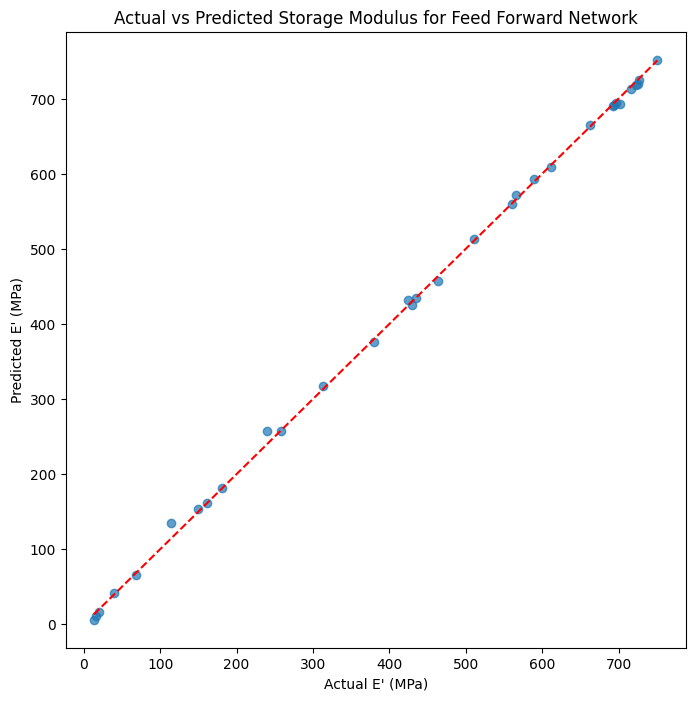

In [42]:
"""
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Convert to numpy arrays
y_pred_np = y_pred.squeeze().numpy()
y_test_np = y_test.numpy()

# Plot actual vs predicted values
plt.scatter(y_test_np, y_pred_np)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red')
plt.title('Actual vs Predicted E\'')
plt.xlabel('Actual E\' (MPa)')
plt.ylabel('Predicted E\' (MPa)')
plt.show()
"""

# Plot Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.xlabel('Actual E\' (MPa)')
plt.ylabel('Predicted E\' (MPa)')
plt.title('Actual vs Predicted Storage Modulus for Feed Forward Network')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Diagonal line
plt.show()
